In [73]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
import time
import progressbar
from matplotlib import cm

In [74]:
def fermidirac(epsilon,mu,T):
    return 1/(np.exp((epsilon-mu)/T)+1)

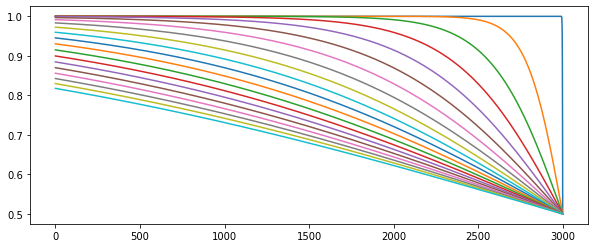

In [75]:
eps=np.linspace(0,3000,1000000)
temps=np.linspace(1,2000,20)
plt.figure(figsize=(10,4))
for i in temps:
    name="T="+str(i)
    plt.plot(eps,fermidirac(eps,3000,i),label=name)
plt.legend()
plt.xlim(0,)

Text(0, 0.5, 'P')

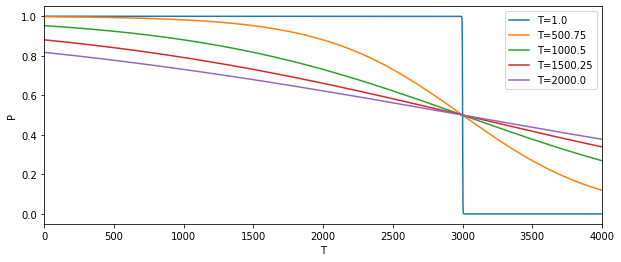

In [208]:
eps=np.linspace(0,4000,1000000)
temps=np.linspace(1,2000,5)
plt.figure(figsize=(10,4))
for i in temps:
    name="T="+str(i)
    plt.plot(eps,fermidirac(eps,3000,i),label=name)
plt.legend()
plt.xlim(0,4000)
plt.xlabel("T")
plt.ylabel("P")

In [77]:
#constants
h=6.62e-34
c=3.0e8
k=1.38*10**(-23)
def freq(wl):
    return (c/wl)

In [95]:
def planck_law(wl,T):
    #print(freq(wl)**3)
    #print ((2*h*(freq(wl))**3)/(c**2))
    return ((c/wl**2)*(2*np.pi*h*freq(wl)**3)/(c**2))*(1/(np.exp((h*freq(wl))/(k*T))-1))

def planck_wl(wl,T):
    #print(wl**5)
    #print((2*h*c**2)/(wl**5))
    #print(1/(np.exp((h*c)/(wl*k*T))-1))
    return ((2*np.pi*h*c**2)/(wl**5))*(1/(np.exp((h*c)/(wl*k*T))-1))

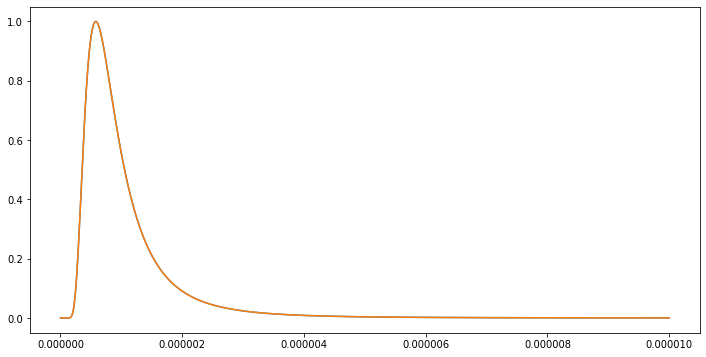

In [96]:
ranges=np.linspace(1*10**(-9),10*10**(-6),10000)
plt.figure(figsize=(12,6))
plt.plot(ranges,(planck_law(ranges,5000)/np.max(planck_law(ranges,5000))))
plt.plot(ranges,planck_wl(ranges,5000)/np.max(planck_wl(ranges,5000)))

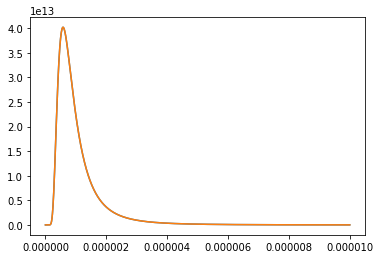

In [97]:
plt.plot(ranges,planck_wl(ranges,5000))
plt.plot(ranges,planck_law(ranges,5000))

(0, 8e-06)

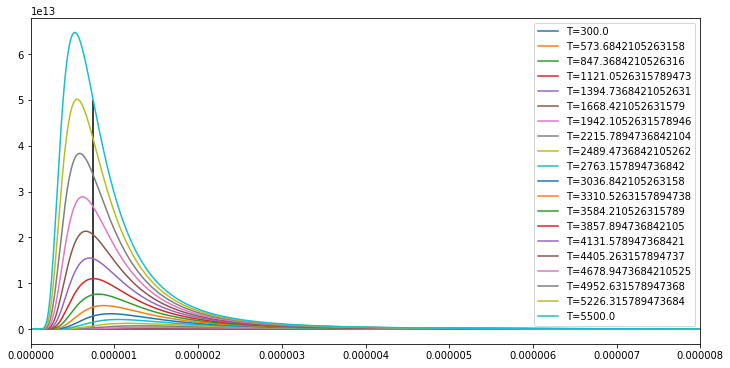

In [98]:
temps=np.linspace(300,5500,20)
plt.figure(figsize=(12,6))
for i in temps:
    name="T="+str(i)
    plt.plot(ranges,planck_law(ranges,i),label=name)
#plt.plot(ranges,planck_law(ranges,270),linewidth=5)
plt.vlines(750*10**(-9),0,50000000000000)
plt.legend()
plt.xlim(0,8*10**(-6))

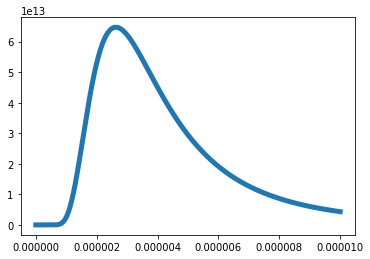

In [99]:
ranges2=np.linspace(1*10**(-9),0.000002,10000)
plt.plot(ranges,planck_law(ranges2,5500),linewidth=5)

In [167]:
ER=6.3781e6
SR=6.957e8
SBcons=5.670373e-8
Tsun=5500
ESD=151.55e9
Ratio=((np.pi*ER**2)/(4*np.pi*ESD**2))

In [168]:
def Pr(TT):
    return (3/10)*4*np.pi*(ER)**2*SBcons*(TT)**4

In [169]:
def todo():
    return ((10*SR**2*Tsun**4)/(7*4*ESD**2))**(1/4)

In [170]:
todo()

288.07542613439983

In [171]:
def tmpt():
    return Tsun*((SR)/(2*ESD))**(1/2)

In [172]:
tmpt()

263.5000627606999

In [173]:
def rectangulos(a, b, n):
    suma = float(0)
    r=np.linspace(a,b,n)
    dx = float((b-a)/n)
    suma = np.sum(funcion(r))*dx
    return suma


In [174]:
T=5500
integrationrange1=np.linspace(0.01*10**(-40),0.00001,10000000)
integral=np.trapz(planck_law(integrationrange1,T),integrationrange1,dx=1)
print(integral)
dato=SBcons*T**4
print(dato)

51817568.8721116
51887456.933125004


In [175]:
dato/integral


1.0013487329207955

In [194]:
def calcularerror(N):
    error=[]
    temps=np.linspace(200,5500,N)
    for i in temps:
        integrationrange1=np.linspace(0.01*10**(-40),0.00001,10000000)
        integ=np.trapz(planck_law(integrationrange1,i),integrationrange1,dx=0.1)
        dat=SBcons*i**4
        print(integ/dat)
        error.append(integ/dat)
    plt.figure(figsize=(6,4))
    plt.plot(temps,error,c="red")
    plt.xlabel("T")
    plt.ylabel("proporción")
    print(error)

0.06661947607441976
0.448270791163314
0.7059457342515985
0.8330210689947257
0.8978208648701202
0.9333780975811887
0.9542696372058357
0.9672712955004867
0.9757572871183287
0.9815193877124512
0.9855638674277041
0.988483686359169
0.9906429818576064
0.9922734836357935
0.9935272995102923
0.9945070185771728
0.9952835069265729
0.9959067676104705
0.9964127581636083
0.9968277800635612
0.9971713698908934
0.997458243143416
0.9976996257113754
0.9979041815372787
0.9980786690536743
0.99822841237224
0.9983576439773514
0.9984697570118692
0.998567493109215
0.9986530837095471
[0.06661947607441976, 0.448270791163314, 0.7059457342515985, 0.8330210689947257, 0.8978208648701202, 0.9333780975811887, 0.9542696372058357, 0.9672712955004867, 0.9757572871183287, 0.9815193877124512, 0.9855638674277041, 0.988483686359169, 0.9906429818576064, 0.9922734836357935, 0.9935272995102923, 0.9945070185771728, 0.9952835069265729, 0.9959067676104705, 0.9964127581636083, 0.9968277800635612, 0.9971713698908934, 0.9974582431434

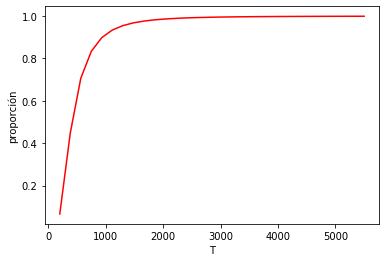

In [195]:
calcularerror(30)

In [178]:
T=5500
puntocI1=np.linspace(0.01*10**(-40),750*10**(-9),1000000)
integralC1=np.trapz(planck_law(puntocI1,T),puntocI1,dx=0.1)
print(integralC1)
puntocI2=np.linspace(750*10**(-9),0.0001,1000000)
integralC2=np.trapz(planck_law(puntocI2,T),puntocI2,dx=0.1)
print(integralC2)
print(integralC1+integralC2)
print(SBcons*(T)**4)

26082061.96242694
25778632.859187454
51860694.8216144
51887456.933125004


In [196]:
def recieved(integral):
    return 4*np.pi*SR**2*integral*Ratio

In [200]:
visible=0.31*tierragarra(integralC1)
infrarojo=0.51*tierragarra(integralC2)

In [201]:
def temperatura(pot):
    return (pot/(4*np.pi*ER**2*SBcons))**(1/4)

In [202]:
temperatura(visible+infrarojo)

210.74904935849938

In [188]:
temperatura(tierragarra(integral))

263.411289777676

In [189]:
def funcioncompleta(X):
    return ((4*np.pi*SR**2)*X*((np.pi*ER**2)/(4*np.pi*ESD**2))/((4*np.pi*ER**2*SBcons)))**(1/4)

In [190]:
funcioncompleta(integral)

263.411289777676